## Decision Trees
---

We are going to try and see if we can predict delay from our flight delay + weather dataset. Since decision trees are suitable for categorical variables and continuous variables, we will make a prediction of a continous variable. Meaning that we will use a regression based version of decisions trees. 

**Let's grab the merged dataset that we are going to use**

In [26]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor

pd.set_option('display.max_columns',99)

In [3]:
data_path = os.path.join('..','data','flights_weather.csv')

# read the dataset into a dataframe (car)
# there are some columns which get read in as the wrong datatype,
# so we want to keep them as strings
dtypes = {
    'ORIGIN_AIRPORT': 'str', 
    'DESTINATION_AIRPORT': 'str', 
    'IATA_CODE_x': 'str', 
    'origin_weather_station': 'str', 
    'IATA_CODE_y': 'str', 
    'destination_weather_station': 'str', 
    'OR_MAX': 'str', 
    'OR_MIN': 'str', 
    'OR_PRCP': 'str', 
    'DES_MAX': 'str', 
    'DES_MIN': 'str', 
    'DES_PRCP': 'str', 
    'OR_FRSHTT': 'str', 
    'DES_FRSHTT': 'str'
}
fw_df = pd.read_csv(data_path, dtype=dtypes, parse_dates=['DATE'])

In [4]:
fw_df.head()

,Unnamed: 0,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,...,DES_COUNT_VISIB,DES_WDSP,DES_COUNT_WDSP,DES_MXSPD,DES_GUST,DES_MAX,DES_MIN,DES_PRCP,DES_SNDP,DES_FRSHTT
0,0,2015,1,1,4,AS,98,N407AS,ANC,SEA,...,24.0,4.6,24.0,11.1,999.9,42.1,26.1,0.00G,999.9,000000
1,1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,...,24.0,5.5,24.0,9.9,999.9,79.0,70.0,0.33G,999.9,010000
2,2,2015,1,1,4,US,840,N171US,SFO,CLT,...,24.0,2.3,24.0,7.0,999.9,53.1,26.1,0.00G,999.9,000000
3,3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,...,24.0,4.1,24.0,11.1,999.9,82.0,70.0,0.00G,999.9,000000
4,4,2015,1,1,4,AS,135,N527AS,SEA,ANC,...,24.0,3.6,24.0,6.0,999.9,43.0,32.0,0.09G,999.9,110000


### Let's clean things up a little bit
---
Let's get rid of the Unnamed column and add a new column called label which labels each as delayed
or not.

In [28]:
#fw_df.drop('Unnamed: 0', axis=1, inplace=True)
fw_df.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,DATE,IATA_CODE_x,origin_weather_station,IATA_CODE_y,destination_weather_station,OR_TEMP,OR_COUNT_TEMP,OR_DEWP,OR_COUNT_DEWP,OR_SLP,OR_COUNT_SLP,OR_STP,OR_COUNT_STP,OR_VISIB,OR_COUNT_VISIB,OR_WDSP,OR_COUNT_WDSP,OR_MXSPD,OR_GUST,OR_MAX,OR_MIN,OR_PRCP,OR_SNDP,OR_FRSHTT,DES_TEMP,DES_COUNT_TEMP,DES_DEWP,DES_COUNT_DEWP,DES_SLP,DES_COUNT_SLP,DES_STP,DES_COUNT_STP,DES_VISIB,DES_COUNT_VISIB,DES_WDSP,DES_COUNT_WDSP,DES_MXSPD,DES_GUST,DES_MAX,DES_MIN,DES_PRCP,DES_SNDP,DES_FRSHTT
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,2354.0,-11.0,21.0,15.0,205.0,194.0,169.0,1448,404.0,4.0,430,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-01,ANC,702725-26491,SEA,727930-24233,35.1,24.0,30.7,24.0,1020.1,14.0,1015.2,24.0,7.5,24.0,3.6,24.0,6.0,999.9,43.0,32.0,0.09G,999.9,110000,32.9,24.0,22.2,24.0,1029.7,24.0,1012.7,24.0,10.0,24.0,4.6,24.0,11.1,999.9,42.1,26.1,0.00G,999.9,000000
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,2.0,-8.0,12.0,14.0,280.0,279.0,263.0,2330,737.0,4.0,750,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-01,LAX,722950-23174,PBI,722030-12844,47.1,24.0,22.5,24.0,1018.8,24.0,1007.2,24.0,10.0,24.0,5.5,24.0,15.0,999.9,57.0,36.0,0.00G,999.9,000000,74.1,24.0,69.7,24.0,1021.1,22.0,1020.5,24.0,9.1,24.0,5.5,24.0,9.9,999.9,79.0,70.0,0.33G,999.9,010000
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,18.0,-2.0,16.0,34.0,286.0,293.0,266.0,2296,800.0,11.0,806,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-01,SFO,724940-23234,CLT,723140-13881,49.5,24.0,30.9,24.0,1019.4,24.0,1018.8,24.0,10.0,24.0,7.8,24.0,15.0,999.9,57.9,39.9,0.00G,999.9,000000,38.4,24.0,28.4,24.0,1026.8,24.0,998.5,24.0,9.7,24.0,2.3,24.0,7.0,999.9,53.1,26.1,0.00G,999.9,000000
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,15.0,-5.0,15.0,30.0,285.0,281.0,258.0,2342,748.0,8.0,805,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-01,LAX,722950-23174,MIA,722020-12839,47.1,24.0,22.5,24.0,1018.8,24.0,1007.2,24.0,10.0,24.0,5.5,24.0,15.0,999.9,57.0,36.0,0.00G,999.9,000000,74.8,24.0,67.8,24.0,1021.3,24.0,1020.2,24.0,8.9,24.0,4.1,24.0,11.1,999.9,82.0,70.0,0.00G,999.9,000000
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,24.0,-1.0,11.0,35.0,235.0,215.0,199.0,1448,254.0,5.0,320,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-01,SEA,727930-24233,ANC,702725-26491,32.9,24.0,22.2,24.0,1029.7,24.0,1012.7,24.0,10.0,24.0,4.6,24.0,11.1,999.9,42.1,26.1,0.00G,999.9,000000,35.1,24.0,30.7,24.0,1020.1,14.0,1015.2,24.0,7.5,24.0,3.6,24.0,6.0,999.9,43.0,32.0,0.09G,999.9,110000


In [36]:
type(fw_df['OR_PRCP'][0])

str


### We've got a lot of variables!
---
There is 75 columns, there. Let's create a correlation heatmap and use that
to select some strongly correlated variables, with which we can produce a 
pair plot to get a little more insight into interesting variable.
This way we can try to intelligently choose the variables to use as features for our decision tree model.

In [71]:
# get the correlation of the dataset
t = fw_df[[
    'DEPARTURE_DELAY','WEATHER_DELAY',
    'OR_TEMP', 'DEPARTURE_TIME', 'SCHEDULED_DEPARTURE',
    'ORIGIN_AIRPORT', 'OR_PRCP'
]].copy()
t['OR_PRCP'].dropna(inplace=True)
t['OR_PRCP'] = t['OR_PRCP'].apply(lambda x: float(str(x)[:-1]))
corr = t.corr()

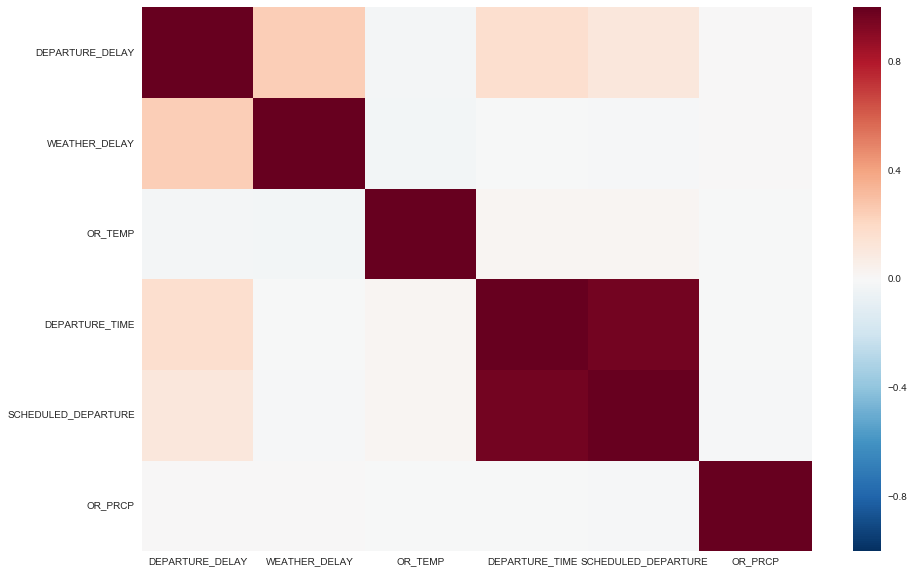

In [72]:
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(
    corr,
    xticklabels=corr.columns.values,
    yticklabels=corr.columns.values,
    ax=ax
)

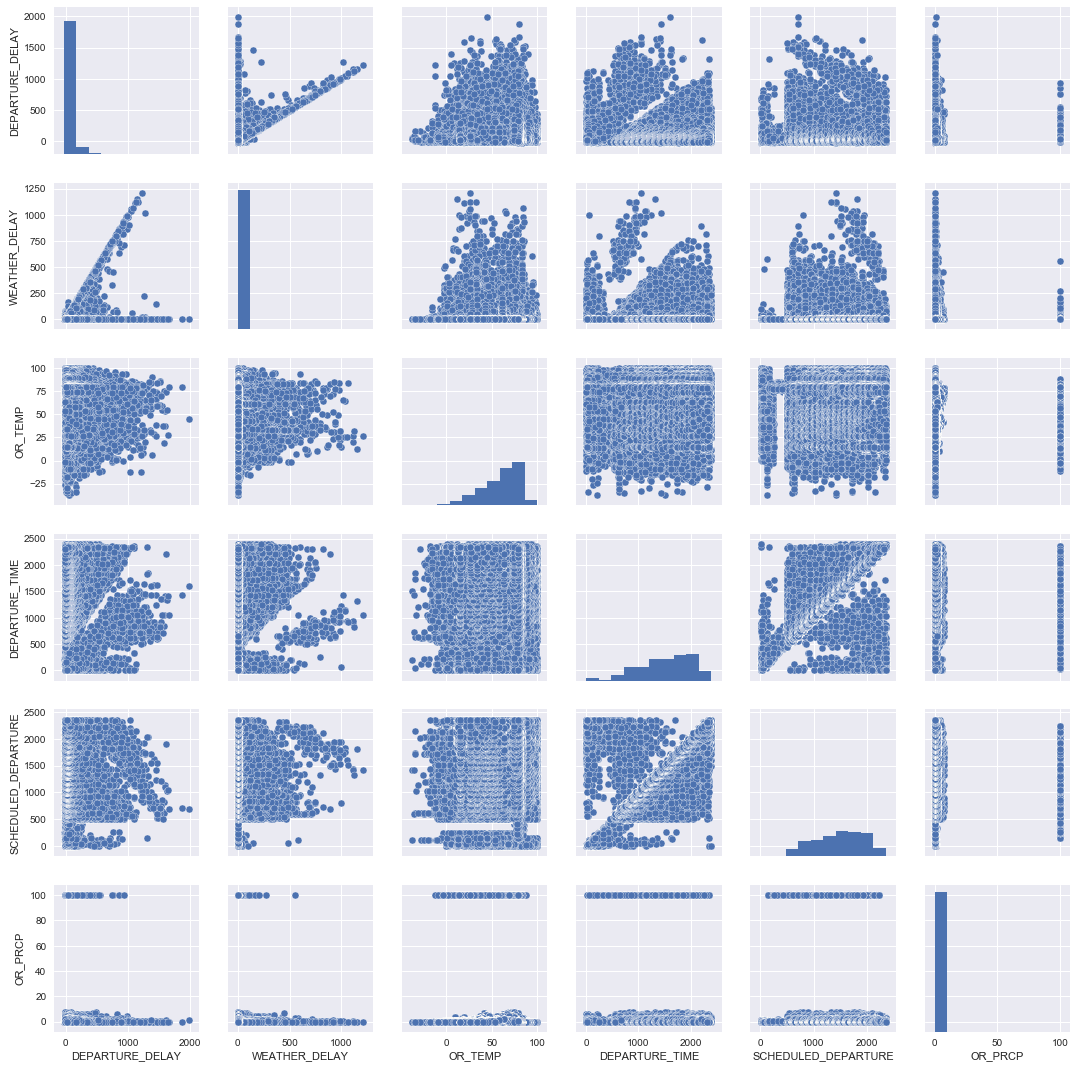

In [73]:
sns.pairplot(t.dropna())

It's a little difficult to get anything too interesting. We can see that it seems like our target
variable of DEPARTURE_DELAY, doesn't correlate strongly with any weather related variables. Which
is mostly what we want to look at. We can also try looking at DEPARTURE_DELAY vs SCHEDULED_DEPARTURE.

### Let's drop most of the columns and use only a few
---
Let's use DEPARTURE_DELAY, 